<a href="https://colab.research.google.com/github/daniyal-alam/IICT-Project/blob/main/AI_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import random
import string
import numpy as np

# Generate random data with inconsistencies and missing values
def generate_unclean_data(num_entries=1000):
    interests = ['math', 'science', 'programming', 'art', 'history', 'music', 'literature', 'Math', 'SCIENCE', 'art', 'Hist', 'music']
    courses = ['computer science', 'biology', 'psychology', 'art history', 'physics', 'chemistry', 'comp sci', 'Bio', 'psych', 'art hist', 'Phys', 'chem']
    study_goals = ['exam preparation', 'project collaboration', 'research', 'homework help', '', 'exam prep', 'collab', 'Research']
    years_of_study = ['freshman', 'sophomore', 'junior', 'senior', 'fresh', 'soph', 'jun', 'sen']

    def generate_password(length=8):
        letters = string.ascii_letters
        return ''.join(random.choice(letters) for i in range(length))

    data = {
        'User ID': [f'user_{i+1}' for i in range(num_entries)] + [f'user_{i+1}' for i in range(num_entries//10)],
        'Password': [generate_password() for _ in range(num_entries + num_entries//10)],
        'Interests': [random.choice(interests) for _ in range(num_entries + num_entries//10)],
        'Courses': [random.choice(courses) for _ in range(num_entries + num_entries//10)],
        'Study Goals': [random.choice(study_goals) for _ in range(num_entries + num_entries//10)],
        'Year of Study': [random.choice(years_of_study) for _ in range(num_entries + num_entries//10)]
    }

    df = pd.DataFrame(data)

    # Introduce missing values
    for col in df.columns:
        df.loc[df.sample(frac=0.1).index, col] = np.nan

    return df

# Generate dataset and save as CSV
df_unclean = generate_unclean_data()
df_unclean.to_csv('/content/AI_Project/study_group_unclean_data.csv', index=False)
df_unclean.head()


,User ID,Password,Interests,Courses,Study Goals,Year of Study
0,user_1,gSoZHzAe,NaN,chemistry,exam prep,soph
1,user_2,SNuiozxg,art,Phys,collab,soph
2,user_3,wLYiSgIt,SCIENCE,computer science,Research,sen
3,user_4,noQmPvWE,NaN,psychology,exam preparation,sen
4,user_5,NaN,Math,biology,project collaboration,soph


In [17]:
import pandas as pd

# Load the unclean dataset
df_unclean = pd.read_csv('/content/AI_Project/study_group_unclean_data.csv')

# Data Cleaning Process
def clean_data(df):
    # Remove duplicates
    df_cleaned = df.drop_duplicates()

    # Handle missing values: Fill with 'Unknown' for simplicity

    df_cleaned = df_cleaned.replace('Unknown', pd.NA)
    df_cleaned = df_cleaned.dropna()

    # Correct inconsistencies in 'Interests'
    df_cleaned['Interests'] = df_cleaned['Interests'].str.lower()
    df_cleaned['Interests'] = df_cleaned['Interests'].replace({
        'math': 'math', 'Math': 'math',
        'science': 'science', 'SCIENCE': 'science',
        'Hist': 'history'
    })

    # Correct inconsistencies in 'Courses'
    df_cleaned['Courses'] = df_cleaned['Courses'].str.lower()
    df_cleaned['Courses'] = df_cleaned['Courses'].replace({
        'computer science': 'computer science', 'comp sci': 'computer science',
        'biology': 'biology', 'bio': 'biology',
        'psychology': 'psychology', 'psych': 'psychology',
        'art history': 'art history', 'art hist': 'art history',
        'physics': 'physics', 'phys': 'physics',
        'chemistry': 'chemistry', 'chem': 'chemistry'
    })

    # Correct inconsistencies in 'Study Goals'
    df_cleaned['Study Goals'] = df_cleaned['Study Goals'].str.lower()
    df_cleaned['Study Goals'] = df_cleaned['Study Goals'].replace({
        'exam preparation': 'exam preparation', 'exam prep': 'exam preparation',
        'project collaboration': 'project collaboration', 'collab': 'project collaboration',
        'research': 'research',
        'homework help': 'homework help'
    })

    # Correct inconsistencies in 'Year of Study'
    df_cleaned['Year of Study'] = df_cleaned['Year of Study'].str.lower()
    df_cleaned['Year of Study'] = df_cleaned['Year of Study'].replace({
        'freshman': 'freshman', 'fresh': 'freshman',
        'sophomore': 'sophomore', 'soph': 'sophomore',
        'junior': 'junior', 'jun': 'junior',
        'senior': 'senior', 'sen': 'senior'
    })

    return df_cleaned

# Clean the dataset
df_cleaned = clean_data(df_unclean)

# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/AI_Project/study_group_clean_data.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

# Display the first few rows of cleaned data
clean_data_preview = df_cleaned.head(10)
clean_data_preview, cleaned_file_path


(    User ID  Password    Interests           Courses            Study Goals  \
 1    user_2  SNuiozxg          art           physics  project collaboration   
 2    user_3  wLYiSgIt      science  computer science               research   
 6    user_7  RjpwzCWE  programming        psychology       exam preparation   
 10  user_11  RofHZLKl          art  computer science          homework help   
 11  user_12  PsxrtXXF          art           biology       exam preparation   
 12  user_13  JXXSEqvu         hist        psychology          homework help   
 13  user_14  YAcxqEPl         math           biology               research   
 14  user_15  KwIYLfbP  programming           biology  project collaboration   
 15  user_16  RwiNtAaa      science           physics               research   
 17  user_18  LDXgDWHG  programming           physics               research   
 
    Year of Study  
 1      sophomore  
 2         senior  
 6      sophomore  
 10      freshman  
 11        senior 

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

# Load the cleaned dataset
df_cleaned = pd.read_csv('/content/AI_Project/study_group_clean_data.csv')

# Display the cleaned data
print("Cleaned Data:")
print(df_cleaned.head(10))

# Define preprocessing for numerical columns (standardize them)
# Note: Assume there are numerical columns to standardize. Add them if needed.
numeric_features = []  # Add numerical feature names if any
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns (encode them)
categorical_features = ['Interests', 'Courses', 'Study Goals', 'Year of Study']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine both transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing to obtain transformed data
df_transformed = preprocessor.fit_transform(df_cleaned)

# Convert the transformed data back to a DataFrame with appropriate column names
encoded_cols = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names = list(encoded_cols)

df_transformed_df = pd.DataFrame(df_transformed.toarray(), columns=feature_names)

# Display the transformed data with assigned column names
print("\nTransformed Data with Assigned Column Names:")
print(df_transformed_df.head())

# Save the transformed dataset to a new CSV file
transformed_file_path = '/content/AI_Project/study_group_transformed_data.csv'
df_transformed_df.to_csv(transformed_file_path, index=False)
print("\nTransformed data saved to:", transformed_file_path)

# Perform feature engineering (example: creating interaction terms)
# Example: Adding a new feature 'is_science_major' if the student is interested in science or computer science
df_transformed_df['is_science_major'] = df_cleaned['Interests'].apply(lambda x: 1 if x in ['science', 'computer science'] else 0)

# Save the updated transformed dataset with new features
transformed_featured_file_path = '/content/AI_Project/study_group_transformed_featured_data.csv'
df_transformed_df.to_csv(transformed_featured_file_path, index=False)
print("\nTransformed data with new features saved to:", transformed_featured_file_path)

# Save the preprocessor for future use
joblib.dump(preprocessor, 'preprocessor.pkl')


Cleaned Data:
   User ID  Password    Interests           Courses            Study Goals  \
0   user_2  SNuiozxg          art           physics  project collaboration   
1   user_3  wLYiSgIt      science  computer science               research   
2   user_7  RjpwzCWE  programming        psychology       exam preparation   
3  user_11  RofHZLKl          art  computer science          homework help   
4  user_12  PsxrtXXF          art           biology       exam preparation   
5  user_13  JXXSEqvu         hist        psychology          homework help   
6  user_14  YAcxqEPl         math           biology               research   
7  user_15  KwIYLfbP  programming           biology  project collaboration   
8  user_16  RwiNtAaa      science           physics               research   
9  user_18  LDXgDWHG  programming           physics               research   

  Year of Study  
0     sophomore  
1        senior  
2     sophomore  
3      freshman  
4        senior  
5      freshman  
6

['preprocessor.pkl']

Columns in the transformed DataFrame:
Index(['Interests_art', 'Interests_hist', 'Interests_history',
       'Interests_literature', 'Interests_math', 'Interests_music',
       'Interests_programming', 'Interests_science', 'Courses_art history',
       'Courses_biology', 'Courses_chemistry', 'Courses_computer science',
       'Courses_physics', 'Courses_psychology', 'Study Goals_exam preparation',
       'Study Goals_homework help', 'Study Goals_project collaboration',
       'Study Goals_research', 'Year of Study_freshman',
       'Year of Study_junior', 'Year of Study_senior',
       'Year of Study_sophomore'],
      dtype='object')


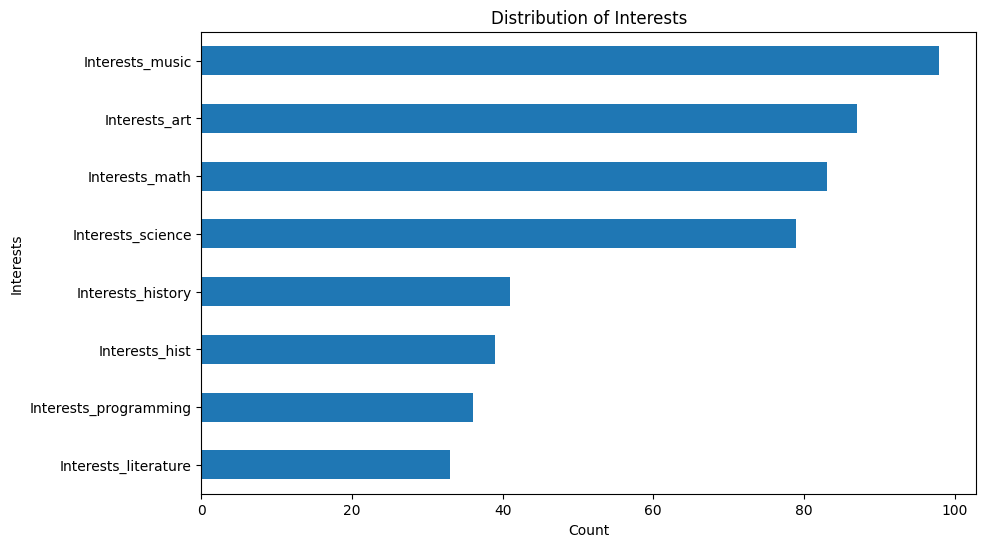

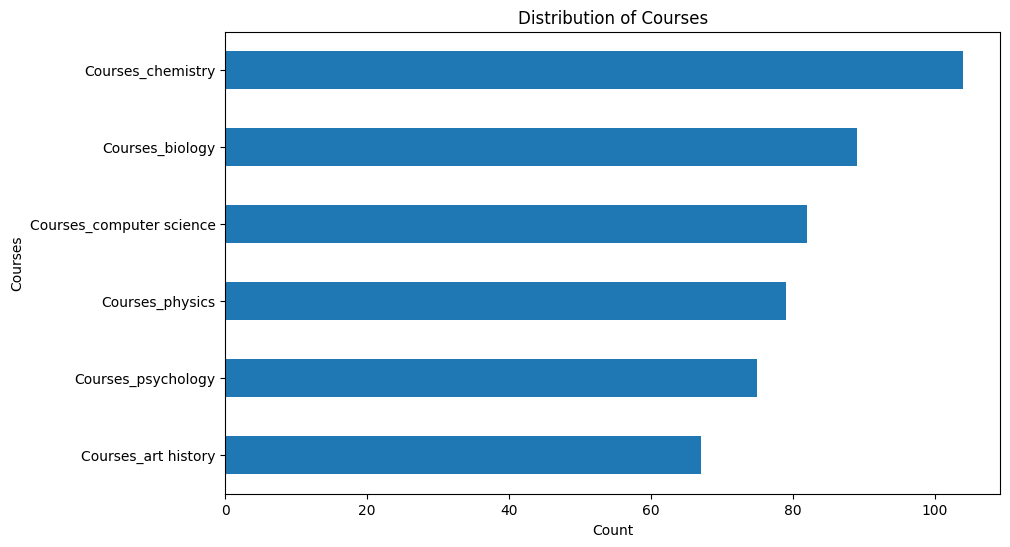

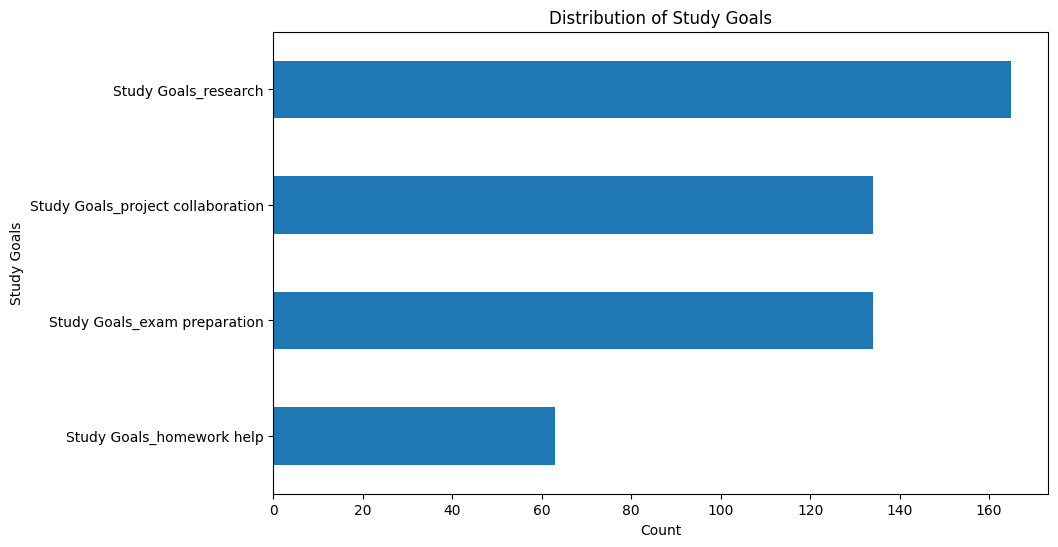

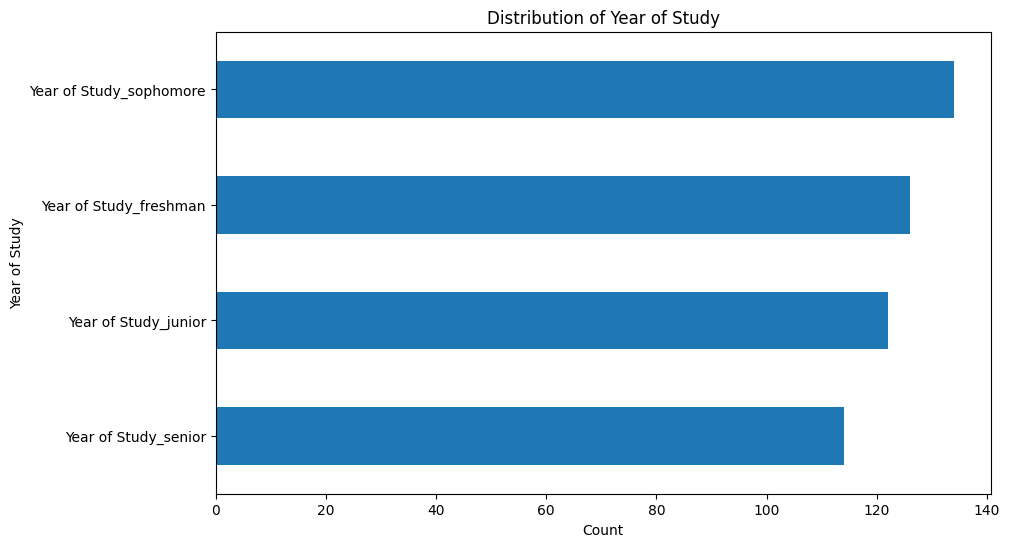

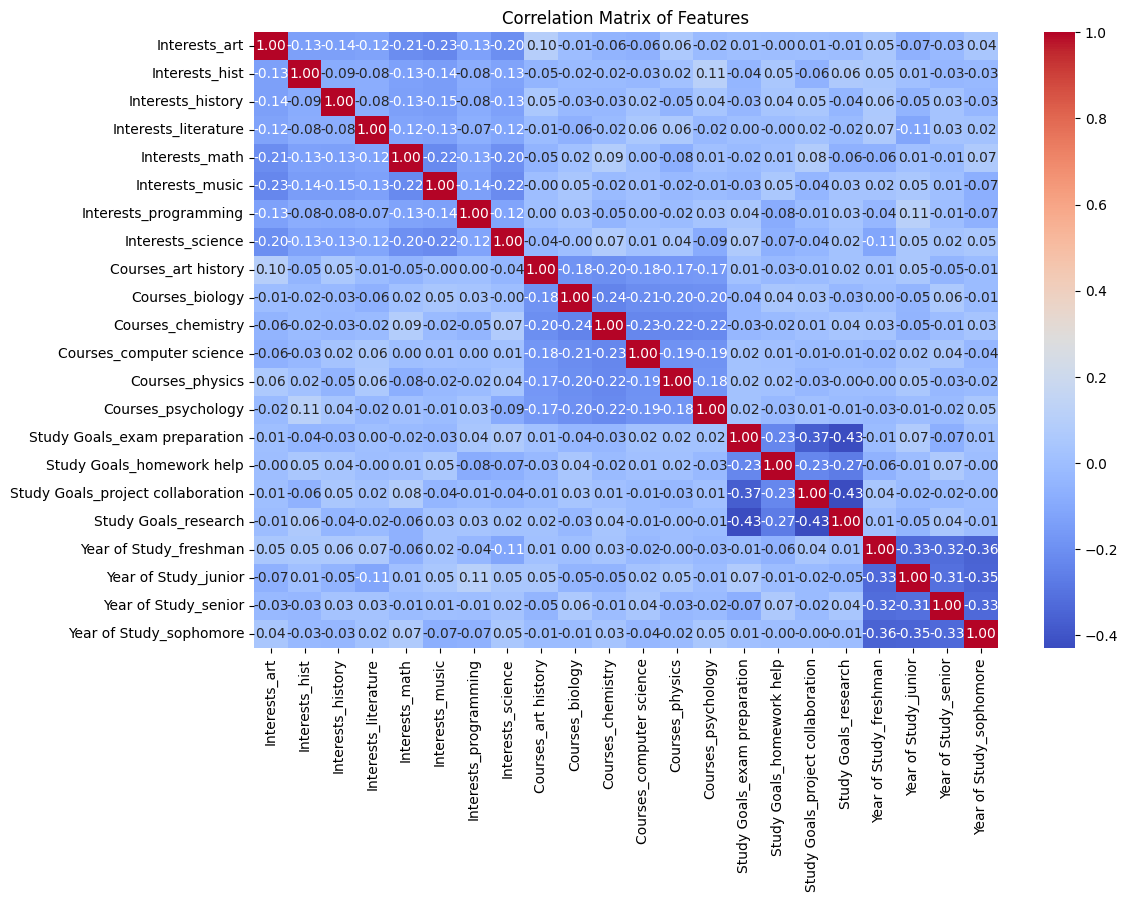

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the transformed dataset
df_transformed = pd.read_csv('/content/AI_Project/study_group_transformed_data.csv')

# Display the columns of the transformed DataFrame
print("Columns in the transformed DataFrame:")
print(df_transformed.columns)

# Combine columns for interests into a single DataFrame for plotting
interests_columns = [col for col in df_transformed.columns if col.startswith('Interests_')]
interests_df = df_transformed[interests_columns]

# Plot distribution of interests
plt.figure(figsize=(10, 6))
interests_df.sum().sort_values().plot(kind='barh')
plt.title('Distribution of Interests')
plt.xlabel('Count')
plt.ylabel('Interests')
plt.show()

# Combine columns for courses into a single DataFrame for plotting
courses_columns = [col for col in df_transformed.columns if col.startswith('Courses_')]
courses_df = df_transformed[courses_columns]

# Plot distribution of courses
plt.figure(figsize=(10, 6))
courses_df.sum().sort_values().plot(kind='barh')
plt.title('Distribution of Courses')
plt.xlabel('Count')
plt.ylabel('Courses')
plt.show()

# Combine columns for study goals into a single DataFrame for plotting
study_goals_columns = [col for col in df_transformed.columns if col.startswith('Study Goals_')]
study_goals_df = df_transformed[study_goals_columns]

# Plot distribution of study goals
plt.figure(figsize=(10, 6))
study_goals_df.sum().sort_values().plot(kind='barh')
plt.title('Distribution of Study Goals')
plt.xlabel('Count')
plt.ylabel('Study Goals')
plt.show()

# Combine columns for year of study into a single DataFrame for plotting
year_of_study_columns = [col for col in df_transformed.columns if col.startswith('Year of Study_')]
year_of_study_df = df_transformed[year_of_study_columns]

# Plot distribution of year of study
plt.figure(figsize=(10, 6))
year_of_study_df.sum().sort_values().plot(kind='barh')
plt.title('Distribution of Year of Study')
plt.xlabel('Count')
plt.ylabel('Year of Study')
plt.show()

# Compute correlation matrix
correlation_matrix = df_transformed.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


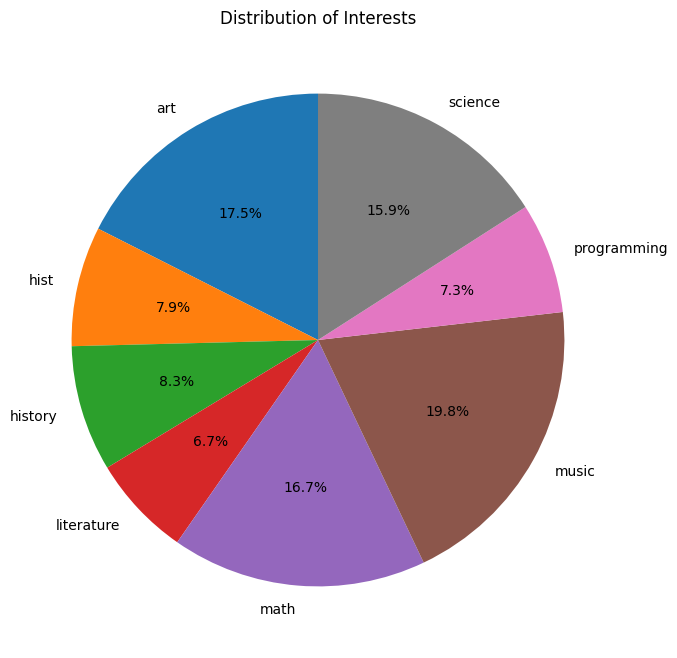

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the transformed dataset
df_transformed = pd.read_csv('/content/AI_Project/study_group_transformed_data.csv')

# Define the original interest list
interests = ['art', 'hist', 'history', 'literature', 'math', 'music', 'programming', 'science']

# Combine columns for interests into a single DataFrame for easier manipulation
interests_columns = [col for col in df_transformed.columns if col.startswith('Interests_')]
interests_df = df_transformed[interests_columns]

# Count the occurrences of each interest
interest_counts = interests_df.sum()

# Create a dictionary to map encoded column names to original interest labels
interest_mapping = {
    'Interests_art': 'art',
    'Interests_hist': 'hist',
    'Interests_history': 'history',
    'Interests_literature': 'literature',
    'Interests_math': 'math',
    'Interests_music': 'music',
    'Interests_programming': 'programming',
    'Interests_science': 'science'
}

# Replace encoded column names with original interest labels
interest_counts.index = interest_counts.index.map(interest_mapping)

# Create a pie chart with original labels
plt.figure(figsize=(8, 8))
plt.pie(interest_counts, labels=interest_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Interests')
plt.show()


Training set size: (396, 21)
Testing set size: (100, 21)
Model Performance:
RandomForest - Accuracy: 0.97, F1 Score: 0.89
LogisticRegression - Accuracy: 1.00, F1 Score: 1.00
DecisionTree - Accuracy: 1.00, F1 Score: 1.00


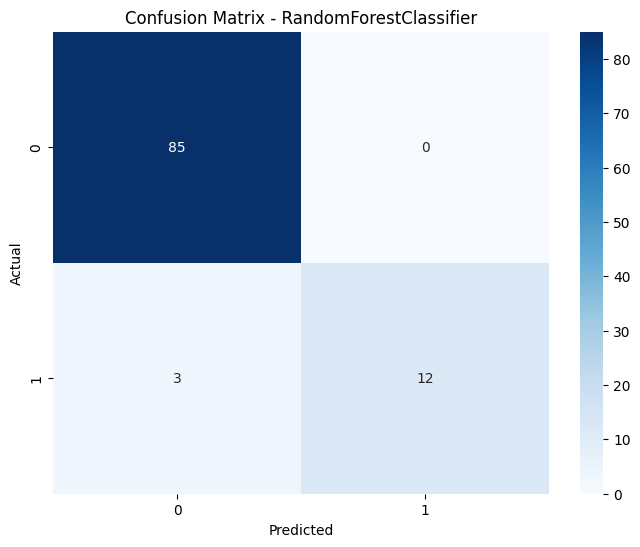

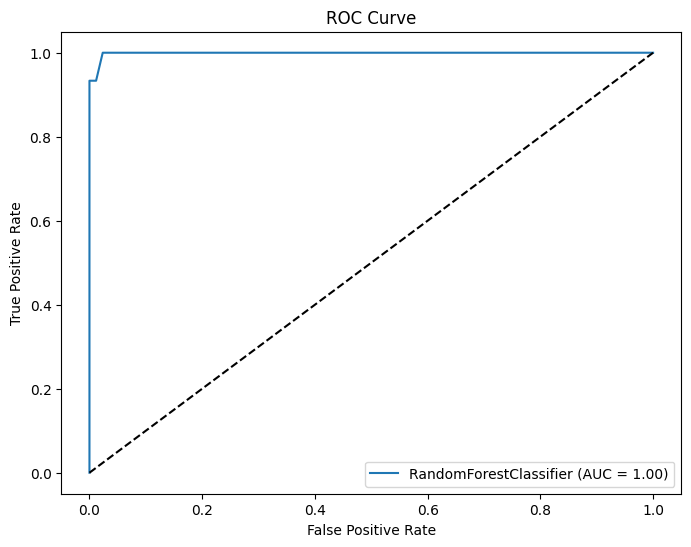

Model Performance Comparison:
                    accuracy  f1_score
LogisticRegression      1.00  1.000000
DecisionTree            1.00  1.000000
RandomForest            0.97  0.888889


['random_forest_model.pkl']

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the transformed dataset
df_transformed = pd.read_csv('/content/AI_Project/study_group_transformed_data.csv')

# Define target variable and features
X = df_transformed.drop(columns=['Interests_science'])  # Assuming 'is_science_major' is our target
y = df_transformed['Interests_science']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Initialize the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Train the models and evaluate their performance
model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_performance[model_name] = {'accuracy': accuracy, 'f1_score': f1}

# Display model performance
print("Model Performance:")
for model_name, metrics in model_performance.items():
    print(f"{model_name} - Accuracy: {metrics['accuracy']:.2f}, F1 Score: {metrics['f1_score']:.2f}")

# Evaluate RandomForestClassifier
rf_model = models['RandomForest']
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RandomForestClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Convert model performance to DataFrame for easier comparison
performance_df = pd.DataFrame(model_performance).T
performance_df = performance_df.sort_values(by='accuracy', ascending=False)

print("Model Performance Comparison:")
print(performance_df)

# Save model performance to CSV
performance_df.to_csv('/content/AI_Project/model_performance_comparison.csv', index=True)

# Save the preprocessor for future use
joblib.dump(rf_model, 'random_forest_model.pkl')


In [31]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [67]:
import os

# Create the 'templates' directory if it doesn't exist
if not os.path.exists('templates'):
    os.makedirs('templates')

html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Login</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f0f0f0;
            margin: 0;
            padding: 0;
        }
        .login-container {
            max-width: 400px;
            margin: 100px auto;
            background-color: #fff;
            padding: 20px;
            border-radius: 5px;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }
        h2 {
            text-align: center;
            color: #333;
        }
        form {
            text-align: center;
        }
        input[type="text"],
        input[type="password"] {
            width: 100%;
            padding: 10px;
            margin: 5px 0;
            box-sizing: border-box;
            border: 1px solid #ccc;
            border-radius: 4px;
        }
        input[type="submit"] {
            background-color: #4CAF50;
            color: white;
            padding: 10px 20px;
            margin: 8px 0;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            font-size: 16px;
        }
        input[type="submit"]:hover {
            background-color: #45a049;
        }
    </style>
</head>
<body>
    <div class="login-container">
        <h2>Login</h2>
        <form method="post" action="{{ url_for('do_login') }}">
            User ID: <input type="text" name="userid" required><br>
            Password: <input type="password" name="password" required><br>
            <input type="submit" value="Login">
        </form>
    </div>
</body>
</html>
"""

with open('templates/login.html', 'w') as file:
    file.write(html_content)


In [68]:
''' html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Dashboard</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f8f9fa;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            color: #333;
        }
        .container {
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            width: 300px;
        }
        h2 {
            color: #007bff;
            margin-bottom: 20px;
        }
        form {
            display: flex;
            flex-direction: column;
            margin-bottom: 20px;
        }
        input[type="text"], input[type="submit"] {
            padding: 10px;
            margin: 10px 0;
            border: 1px solid #ddd;
            border-radius: 4px;
        }
        input[type="submit"] {
            background-color: #007bff;
            color: #fff;
            border: none;
            cursor: pointer;
        }
        input[type="submit"]:hover {
            background-color: #0056b3;
        }
        a {
            display: inline-block;
            color: #007bff;
            text-decoration: none;
            margin-top: 10px;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Study Group Finder</h2>
        <form method="post" action="{{ url_for('search') }}">
            Favorite Subject: <input type="text" name="subject" required><br>
            <input type="submit" value="Search">
        </form>
        <form method="post" action="{{ url_for('logout') }}">
            <input type="submit" value="Logout">
        </form>
        <a href="{{ url_for('view_groups') }}">View Group Partners</a>
    </div>
</body>
</html>

"""
with open('templates/dashboard.html', 'w') as file:
    file.write(html_content) '''

' html_content = """\n<!DOCTYPE html>\n<html>\n<head>\n    <title>Dashboard</title>\n    <style>\n        body {\n            font-family: Arial, sans-serif;\n            background-color: #f8f9fa;\n            margin: 0;\n            padding: 0;\n            display: flex;\n            justify-content: center;\n            align-items: center;\n            height: 100vh;\n            color: #333;\n        }\n        .container {\n            background-color: #fff;\n            padding: 20px;\n            border-radius: 8px;\n            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);\n            width: 300px;\n        }\n        h2 {\n            color: #007bff;\n            margin-bottom: 20px;\n        }\n        form {\n            display: flex;\n            flex-direction: column;\n            margin-bottom: 20px;\n        }\n        input[type="text"], input[type="submit"] {\n            padding: 10px;\n            margin: 10px 0;\n            border: 1px solid #ddd;\n            bo

In [74]:
html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Search Results</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f8f9fa;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: flex-start; /* Align items from the top */
            height: 100vh;
            color: #333;
        }
        .container {
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            width: 400px;
            margin-top: 20px; /* Add top margin */
        }
        h2 {
            color: #007bff;
            margin-bottom: 20px;
        }
        p {
            background-color: #f1f1f1;
            padding: 10px;
            border-radius: 4px;
            margin-bottom: 10px;
            display: flex;
            justify-content: space-between;
            align-items: center;
        }
        form {
            margin: 0;
        }
        input[type="submit"] {
            background-color: #007bff;
            color: #fff;
            padding: 5px 10px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
        }
        input[type="submit"]:hover {
            background-color: #0056b3;
        }
        a {
            display: inline-block;
            color: #007bff;
            text-decoration: none;
            margin-top: 20px;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Matching Users</h2>
        {% for user in users %}
            <p>{{ user }}
                <form method="post" action="{{ url_for('request_group') }}" style="display: inline;">
                    <input type="hidden" name="target_user_id" value="{{ user }}">
                    <input type="submit" value="Request for Group">
                </form>
            </p>
        {% endfor %}
        <a href="{{ url_for('dashboard') }}">Back to Dashboard</a>
    </div>
</body>
</html>

"""
with open('templates/results.html', 'w') as file:
    file.write(html_content)


In [56]:
html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>My Groups</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f8f9fa;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            color: #333;
        }
        .container {
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            width: 400px;
        }
        h2 {
            color: #007bff;
            margin-bottom: 20px;
        }
        p {
            background-color: #f1f1f1;
            padding: 10px;
            border-radius: 4px;
            margin-bottom: 10px;
        }
        a {
            display: inline-block;
            color: #007bff;
            text-decoration: none;
            margin-top: 20px;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>My Study Groups</h2>
        {% for group in groups %}
            <p>{{ group }}</p>
        {% endfor %}
        <a href="{{ url_for('dashboard') }}">Back to Dashboard</a>
    </div>
</body>
</html>

"""
with open('templates/groups.html', 'w') as file:
    file.write(html_content)


In [36]:
!pip install flask flask-ngrok pandas

In [37]:
!pip install flask-ngrok

In [38]:
!pip install pyngrok

In [39]:
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.2 MB/s eta 0:00:00


In [42]:
!ngrok config add-authtoken 2hPw4QT6RerFr22v7hjTXnq7jXI_3KN1wLwtsiiERoZJrsHxQ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [43]:
from pyngrok import ngrok

# Setting the new ngrok authtoken
ngrok.set_auth_token("2hPw4QT6RerFr22v7hjTXnq7jXI_3KN1wLwtsiiERoZJrsHxQ")

# Creating a ngrok tunnel
public_url = ngrok.connect(5000).public_url

print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000\"")

 * ngrok tunnel "https://b01a-35-221-190-186.ngrok-free.app" -> "http://127.0.0.1:5000"


In [44]:
port_no = 5000

In [45]:
!pip install flask flask-ngrok pandas


In [46]:
!pip install flask flask-ngrok pyngrok pandas


In [70]:
%%writefile templates/dashboard.html
<!DOCTYPE html>
<html>
<head>
    <title>Dashboard</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f8f9fa;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            color: #333;
        }
        .container {
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            width: 400px;
        }
        h2 {
            color: #007bff;
            margin-bottom: 20px;
        }
        form {
            display: flex;
            flex-direction: column;
            margin-bottom: 20px;
        }
        input[type="text"] {
            padding: 10px;
            margin: 10px 0;
            border: 1px solid #ddd;
            border-radius: 4px;
        }
        input[type="submit"] {
            background-color: #007bff;
            color: #fff;
            padding: 10px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
        }
        input[type="submit"]:hover {
            background-color: #0056b3;
        }
        a {
            display: inline-block;
            color: #007bff;
            text-decoration: none;
            margin-top: 10px;
        }
        a:hover {
            text-decoration: underline;
        }
        .user-info {
            margin-top: 10px;
            font-size: 14px;
            color: #555;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Study Group Finder</h2>
        <h2>Welcome, {{ user_id }}</h2> <!-- Display the user_id here -->
        <form method="post" action="{{ url_for('search') }}">
            Favorite Subject: <input type="text" name="subject" required><br>
            <input type="submit" value="Search">
        </form>
        <a href="{{ url_for('view_groups') }}">View Group Partners</a><br>
        <a href="{{ url_for('view_requests') }}">View Group Requests</a> <!-- New link to view requests -->
        <form method="post" action="{{ url_for('logout') }}">
            <input type="submit" value="Logout">
        </form>
    </div>
</body>
</html>


Overwriting templates/dashboard.html


In [76]:
%%writefile templates/requests.html
<!DOCTYPE html>
<html>
<head>
    <title>Group Requests</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f8f9fa;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: flex-start;
            height: 100vh;
            color: #333;
        }
        .container {
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            width: 400px;
            margin-top: 20px;
        }
        h2 {
            color: #007bff;
            margin-bottom: 20px;
        }
        p {
            background-color: #f1f1f1;
            padding: 10px;
            border-radius: 4px;
            margin-bottom: 10px;
            display: flex;
            justify-content: space-between;
            align-items: center;
        }
        form {
            display: inline;
            margin: 0;
        }
        input[type="submit"] {
            background-color: #007bff;
            color: #fff;
            padding: 5px 10px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            margin-left: 5px;
        }
        input[type="submit"]:hover {
            background-color: #0056b3;
        }
        a {
            display: inline-block;
            color: #007bff;
            text-decoration: none;
            margin-top: 20px;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Pending Group Requests</h2>
        {% for request in requests %}
            <p>{{ request }}
                <form method="post" action="{{ url_for('accept_request') }}">
                    <input type="hidden" name="requester_id" value="{{ request }}">
                    <input type="submit" value="Accept">
                </form>
                <form method="post" action="{{ url_for('decline_request') }}">
                    <input type="hidden" name="requester_id" value="{{ request }}">
                    <input type="submit" value="Decline">
                </form>
            </p>
        {% endfor %}
        <a href="{{ url_for('dashboard') }}">Back to Dashboard</a>
    </div>
</body>
</html>


Overwriting templates/requests.html


In [49]:
import pandas as pd
from flask import Flask, request, render_template, redirect, url_for, session
from pyngrok import ngrok
import pickle
import threading

app = Flask(__name__)
app.secret_key = 'supersecretkey'

# Load the dataset
df = pd.read_csv('/content/AI_Project/study_group_clean_data.csv')
df['Groups'] = [[] for _ in range(len(df))]  # Add a column for study groups
df['Requests'] = [[] for _ in range(len(df))]  # Add a column for group requests

# Load the trained model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/')
def login():
    return render_template('login.html')

@app.route('/login', methods=['POST'])
def do_login():
    user_id = request.form['userid']
    password = request.form['password']

    # Print statements for debugging
    print(f"Attempting to login with User ID: '{user_id}' and Password: '{password}'")

    # Strip any leading/trailing whitespace
    user_id = user_id.strip()
    password = password.strip()

    # Print the DataFrame to check its content
    print("Current DataFrame:")
    print(df[['User ID', 'Password']].head())

    # Check for the user in the DataFrame
    user = df[(df['User ID'] == user_id) & (df['Password'] == password)]

    # Print the user DataFrame to verify if the user was found
    print(f"Matching user entries found: {len(user)}")

    if not user.empty:
        session['user_id'] = user_id
        print(f"Login successful for User ID: {user_id}")
        return redirect(url_for('dashboard'))

    print("Invalid credentials. Please try again.")
    return 'Invalid credentials. Please try again.'

@app.route('/logout', methods=['POST'])
def logout():
    session.pop('user_id', None)
    return redirect(url_for('login'))

@app.route('/dashboard')
def dashboard():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    user_id = session['user_id']
    return render_template('dashboard.html', user_id=user_id)

@app.route('/search', methods=['POST'])
def search():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    favorite_subject = request.form['subject']
    matching_users = df[df['Interests'] == favorite_subject]['User ID'].tolist()
    return render_template('results.html', users=matching_users)

@app.route('/request_group', methods=['POST'])
def request_group():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    target_user_id = request.form['target_user_id']
    user_id = session['user_id']
    # Add the request to the target user's requests list
    df.loc[df['User ID'] == target_user_id, 'Requests'].iloc[0].append(user_id)
    return redirect(url_for('dashboard'))

@app.route('/view_groups')
def view_groups():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    user_id = session['user_id']
    # Get the group list for the logged in user
    groups = df.loc[df['User ID'] == user_id, 'Groups'].iloc[0]
    return render_template('groups.html', groups=groups)

@app.route('/view_requests')
def view_requests():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    user_id = session['user_id']
    # Get the request list for the logged in user
    requests = df.loc[df['User ID'] == user_id, 'Requests'].iloc[0]
    return render_template('requests.html', requests=requests)

@app.route('/accept_request', methods=['POST'])
def accept_request():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    requester_id = request.form['requester_id']
    user_id = session['user_id']
    # Add the requester to the user's group and remove the request
    df.loc[df['User ID'] == user_id, 'Groups'].iloc[0].append(requester_id)
    df.loc[df['User ID'] == user_id, 'Requests'].iloc[0].remove(requester_id)
    return redirect(url_for('view_requests'))

@app.route('/decline_request', methods=['POST'])
def decline_request():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    requester_id = request.form['requester_id']
    user_id = session['user_id']
    # Remove the request from the user's request list
    df.loc[df['User ID'] == user_id, 'Requests'].iloc[0].remove(requester_id)
    return redirect(url_for('view_requests'))

@app.route('/dashboard')
def dashboard():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    user_id = session['user_id']
    return render_template('dashboard.html', user_id=user_id)

if __name__ == '__main__':
    # Set your ngrok authtoken
    ngrok.set_auth_token("2hPw4QT6RerFr22v7hjTXnq7jXI_3KN1wLwtsiiERoZJrsHxQ")

    # Set up ngrok and get public URL
    port_no = 5001  # Changed port number to 5001
    public_url = ngrok.connect(port_no).public_url
    print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port_no}\"")

    # Run Flask app in a separate thread
    threading.Thread(target=lambda: app.run(port=port_no, debug=True, use_reloader=False)).start()


 * ngrok tunnel "https://48fe-35-221-190-186.ngrok-free.app" -> "http://127.0.0.1:5001"
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
